In [33]:
# !pip install stanfordcorenlp
# !pip install stanford-corenlp
#!pip install pycorenlp

# #Code to install stanford
# !wget http://nlp.stanford.edu/software/stanford-corenlp-full-2018-02-27.zip
# !unzip stanford-corenlp-full-2018-02-27.zip

## No need for you to run these Dawar, I have created a pickle 

In [19]:
##Run these commands using terminal # No need for you to run these Dawar, I have 

# cd stanford-corenlp-full-2018-02-27/
# java -Xmx16g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer

/Users/biksingh/Natural_Language_Generation/meetup/stanford-corenlp-full-2018-02-27


In [2]:
import pickle 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import json
import numpy as np
from pycorenlp import StanfordCoreNLP

In [38]:
with open('/Users/biksingh/Natural_Language_Generation/meetup/data/death_notes_clean.pickle', 'rb') as handle:
    death_notes_clean = pickle.load(handle)

    
with open('/Users/biksingh/Natural_Language_Generation/meetup/data/death_notes_lemma.pickle', 'rb') as handle:
    death_notes = pickle.load(handle)

file = open('/Users/biksingh/Natural_Language_Generation/meetup/data/death_note_results.json', 'r')
lines = file.readlines()
objs = []
for line in lines:
    objs.append(json.loads(line))

In [4]:
for i in range(len(objs)):
    note = objs[i]['death_note']
    if len(note.strip()) > 0:
        note = (note.encode('ascii', 'ignore')).decode("utf-8")
        objs[i]['death_note'] = note
        

In [151]:
df_original = pd.DataFrame(objs)
df = pd.DataFrame(death_notes_clean)
df = df.drop(['death_note_link', 'info_link'], axis=1)

death_original_sentences = df_original["death_note"].tolist()
death_clean_sentences = df["death_note"].tolist()

In [148]:
# #Stanford Example
# #sents = ["I love you. I hate him. You are nice. He is dumb"]
# def sentiments_function(death_notes):
#     sents = []
#     for i in range(0,len(death_notes)):
        
#         if i != 68 and i != 7 and i != 92 and i != 94 and i != 113 and i != 133 and i != 134 and i != 142 and i != 148 and i != 194 and i != 218 and i != 265 and i != 300:
#             print(i)
#             nlp = StanfordCoreNLP('http://localhost:9000')
#             res = nlp.annotate(death_notes[i],
#                                properties={
#                                    'annotators': 'sentiment',
#                                    'outputFormat': 'json'
#                                })
#             for s in res["sentences"]:
#                 sents.append((" ".join([t["word"] for t in s["tokens"]]),s["sentiment"]))
#     #             print("%d: '%s': %s %s" % (
#     #                 s["index"],
#     #                 " ".join([t["word"] for t in s["tokens"]]),
#     #                 s["sentimentValue"], s["sentiment"]))
#         else:
#             print("else wla",i)

#     return sents

In [167]:
#death_original_sentiments = sentiments_function(death_original_sentences)
#death_clean_sentiments = sentiments_function(death_clean_sentences)

#df_original_sentiments = pd.DataFrame(death_original_sentiments)
#df_clean_sentiments = pd.DataFrame(death_clean_sentiments)


In [171]:
# with open('/Users/biksingh/Natural_Language_Generation/meetup/data/death_original_sentiments.pickle', 'wb') as handle:
#     pickle.dump(death_original_sentiments, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/biksingh/Natural_Language_Generation/meetup/data/death_original_sentiments.pickle', 'rb') as handle:
    death_original_sentiments = pickle.load(handle)
    
df_original_sentiments = pd.DataFrame(death_original_sentiments)

In [172]:
df_original_sentiments.head()

,0,1
0,l want to make sure the Patel family knows I l...,Positive
1,Make sure the kids in the world know I 'm bein...,Neutral
2,I 'm good Warden .,Positive
3,No statement given .,Neutral
4,To everyone that has been there for me you kno...,Negative


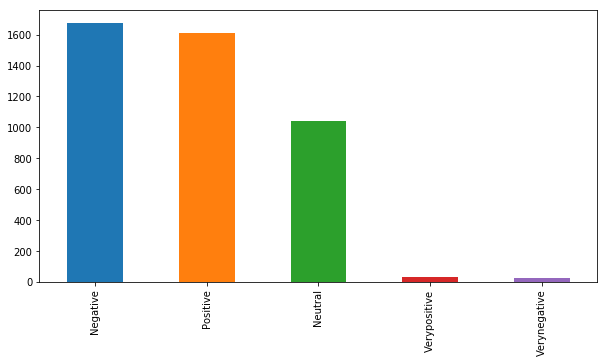

In [173]:
df_original_sentiments[1].value_counts().plot(x="a", y = "b",kind = "bar", figsize = (10,5), title= "")

In [121]:
group_sentiments = df_original_sentiments.groupby(1)

In [175]:
df_original_sentiments.loc[df_original_sentiments[1] == 'Verynegative']

,0,1
78,Tell my kids I 'm sorry for being a disappoint...,Verynegative
421,I know it does n't mean anything ; I told the ...,Verynegative
479,"Joey , I am really sorry , Joe.Marjo , you hav...",Verynegative
770,"We caused a lot of heartache , grief , pain an...",Verynegative
1434,"I have said in interviews , if you want to hur...",Verynegative
1742,It is the worst mistake that I ever made in my...,Verynegative
1823,There are no words to describe the pain and su...,Verynegative
1965,"The Lord is my shepherd ; I shall not want , H...",Verynegative
2115,"I am not angry , but I am disappointed that I ...",Verynegative
2281,Gilbert did n't deserve to die and I want you ...,Verynegative


In [164]:
# import paralleldots
# paralleldots.set_api_key("9JCit9qvrfCCnVGvzvFORFAT4flNJUnuA3lpwq4ywVA")

# emotion_original_sentences = []
# # for multiple sentence as array
# for i in range(0,len(death_original_sentences),20):
#     if i == 540:
        
#         response=paralleldots.batch_emotion(death_original_sentences[i:i+16])
#         emotion_original_sentences.append(response)
#     else:
#         response=paralleldots.batch_emotion(death_original_sentences[i:i+20])
#         emotion_original_sentences.append(response)

In [42]:
df.head()

,age,country,date,death_note,first_name,last_name,race
0,34,Bexar,7/17/2018,l want make sure Patel family knows love like ...,Christopher,Young,Black
1,46,Hopkins,9/27/2018,statement given,Daniel,Acker,White
2,37,Bexar,5/16/2018,everyone know Love yall See yall side Thats,Juan,Castillo,Hispanic
3,51,Smith,9/26/2018,Thank love Sandra nice meeting Love yall good ...,Troy,Clark,White
4,38,Lubbock,3/27/2018,First would like say since September honor pri...,Rosendo,"Rodriguez, III",Histpanic


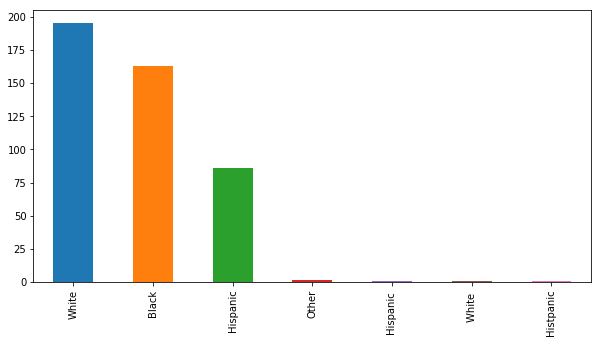

In [6]:
#Ploting according to race
df['race'].value_counts().plot(x="a", y = "b",kind = "bar", figsize = (10,5), title= "")

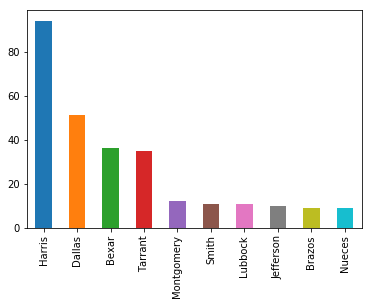

In [5]:
#Ploting accordig to county 
df['country'].value_counts()[:10].plot(kind="bar")

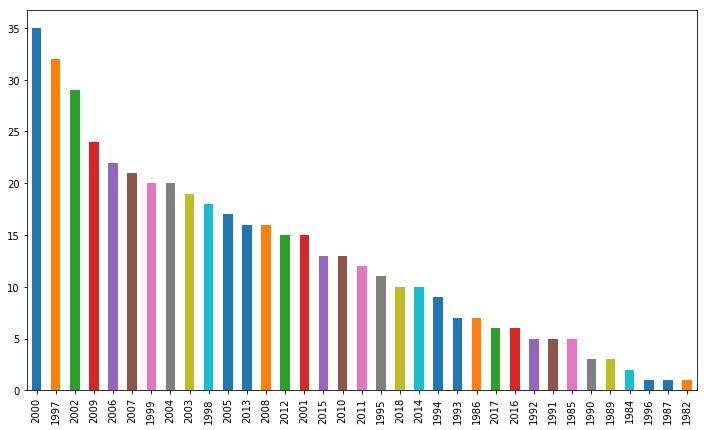

In [7]:
#Ploting according to year

df['year'] = pd.to_datetime(df['date']).apply(lambda x: x.year)
df['year'].value_counts().plot(kind='bar', figsize=(12,7))

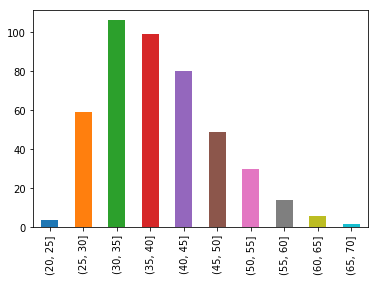

In [8]:
# Ploting according to age ranges

ranges = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
pd.cut(pd.to_numeric(df['age']), ranges).value_counts(sort = False).plot(kind = 'bar')

In [7]:
with open('data/X_train_tfidf.pickle', 'rb') as handle:
    X_train_tfidf = pickle.load(handle)
    
with open('data/glove_weighted_embedding.pickle', 'rb') as handle:
    glove_weighted_embedding = pickle.load(handle)
    
with open('data/glove_avg_embedding.pickle', 'rb') as handle:
    glove_avg_embedding = pickle.load(handle)
    
with open('data/google_weighted_embedding.pickle', 'rb') as handle:
    google_weighted_embedding = pickle.load(handle)
    
with open('data/google_avg_embedding.pickle', 'rb') as handle:
    google_avg_embedding = pickle.load(handle)
    
with open('data/spacy_weighted_embedding.pickle', 'rb') as handle:
    spacy_weighted_embedding = pickle.load(handle)
    
with open('data/spacy_avg_embedding.pickle', 'rb') as handle:
    spacy_avg_embedding = pickle.load(handle)
    
with open('data/ft_weighted_embedding.pickle', 'rb') as handle:
    ft_weighted_embedding = pickle.load(handle)
    
with open('data/ft_avg_embedding.pickle', 'rb') as handle:
    ft_avg_embedding = pickle.load(handle)
    
with open('data/fastText_embedding.pickle', 'rb') as handle:
    fastText_embedding = pickle.load(handle)

In [12]:
embedding = X_train_tfidf
#embedding =  google_avg_embedding
#embedding = google_weighted_embedding
#embedding = glove_avg_embedding
#embedding =  glove_weighted_embedding
#embedding = spacy_weighted_embedding
#embedding = spacy_avg_embedding
#embedding = fastText_embedding
#embedding = ft_weighted_embedding_avg
# embedding = ft_avg_embedding_tfidf
# embedding = use_embedding
# embedding = elmo_embedding

NameError: name 'ft_weighted_embedding_avg' is not defined

In [11]:
print(np.array(embedding).shape)

()


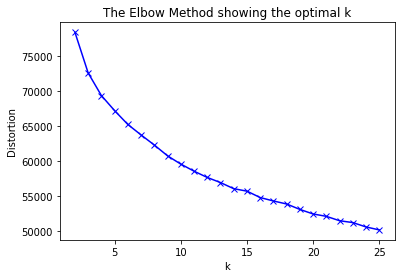

In [345]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

maximum = 25

_ = plt.plot()
distortions = []
K = range(2, maximum+1)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2018)
    _ = kmeans.fit(embedding)
    _ = distortions.append(kmeans.inertia_)

# Plot the elbow
_ = plt.plot(K, distortions, 'bx-')
_ = plt.xlabel('k')
_ = plt.ylabel('Distortion')
_ = plt.title('The Elbow Method showing the optimal k')
plt.show()

In [346]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2018).fit(embedding)
clusters = kmeans.predict(embedding)

In [348]:
note_clusters = {}
for c in set(clusters):
    note_clusters[c] = []
    for i, txt in enumerate(death_notes):
        if clusters[i] == c:
            note_clusters[c].append(txt)
            #print(txt['death_note'])

In [351]:
print(len(note_clusters[0]))
note_clusters[0]

67


[{'first_name': 'Christopher',
  'last_name': 'Young',
  'age': '34',
  'date': '7/17/2018',
  'race': 'Black',
  'country': 'Bexar',
  'info_link': 'http://www.tdcj.state.tx.us/death_row/dr_info/youngchristopher.html',
  'death_note_link': 'http://www.tdcj.state.tx.us/death_row/dr_info/youngchristopherlast.html',
  'death_note': 'l want make sure patel family know love like love make sure kid world know be execute kid have mentor keep fight go be good warden'},
 {'first_name': 'Daniel',
  'last_name': 'Acker',
  'age': '46',
  'date': '9/27/2018',
  'race': 'White',
  'country': 'Hopkins',
  'info_link': 'http://www.tdcj.state.tx.us/death_row/dr_info/ackerdaniel.html',
  'death_note_link': 'http://www.tdcj.state.tx.us/death_row/dr_info/ackerdaniellast.html',
  'death_note': 'statement give'},
 {'first_name': 'Juan',
  'last_name': 'Castillo',
  'age': '37',
  'date': '5/16/2018',
  'race': 'Hispanic',
  'country': 'Bexar',
  'info_link': 'http://www.tdcj.state.tx.us/death_row/dr_info/

In [352]:
#per doc within cluster
bag_of_words = {}

for c_id in range(len(note_clusters)):
    bag_of_words[c_id] = {}
    
    for s_id in range(len(note_clusters[c_id])):
        words_list = note_clusters[c_id][s_id]['death_note'].split()
        bag_of_words[c_id][s_id] = {}
        for word in words_list:
            if word in bag_of_words[c_id][s_id]:
                bag_of_words[c_id][s_id][word] = bag_of_words[c_id][s_id][word] +1
            else:
                bag_of_words[c_id][s_id][word] = 1

for c_id in bag_of_words:
    for s_id in bag_of_words[c_id]:
        sorted_x = dict(sorted(bag_of_words[c_id][s_id].items(), key=lambda kv: kv[1], reverse=True))
        bag_of_words[c_id][s_id] = sorted_x

In [353]:
# for all doc within each cluster

statementFreqDict = {}

for c_id in bag_of_words:
    statementFreqDict[c_id] = {}
    for s_id in bag_of_words[c_id]:
        for word in bag_of_words[c_id][s_id]:
            if word in statementFreqDict[c_id]:
                statementFreqDict[c_id][word] = statementFreqDict[c_id][word] + bag_of_words[c_id][s_id][word]
            else:
                statementFreqDict[c_id][word] = bag_of_words[c_id][s_id][word]

for c_id in bag_of_words:
    sorted_x = dict(sorted(statementFreqDict[c_id].items(), key=lambda kv: kv[1], reverse=True))
    statementFreqDict[c_id] = sorted_x

In [ ]:
statementFreqDict[0]

In [ ]:
arr = np.array(embedding)
tsne = TSNE(n_components=2, random_state=2018)
reduced = tsne.fit_transform(arr)       
t = np.array(reduced).transpose()

In [ ]:
from matplotlib.lines import Line2D

markers = ["x", "v", "o", "s", "*", ">", "<", "P", 
           '1', '2', '3', '4', 'h', "d", "|", "+"]
colors = ['darkorange', 'steelblue', 'limegreen',  'salmon', 'y',  'violet', 'c', 'tomato', 
          'rosybrown', 'brown', 'darkmagenta', 'pink', 'gold', "orange", "skyblue", "seagreen"]

fig, ax = plt.subplots(figsize=(10, 10))

for x, y, c in zip(t[0], t[1], clusters):
    _ = ax.scatter(x, y, c=colors[c], marker=markers[c])

types = []
for c in set(clusters):
    types.append(Line2D([], [], color=colors[c], marker=markers[c], label=c))

# for i, c in enumerate(clusters):
#     if c == 5:
#         _ = ax.annotate(doc_txt[i], (t[0][i], t[1][i]), fontsize=18)

_ = plt.legend(handles=types, loc='lower left')
plt.show()